In [14]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt
import random
import argparse
from collections import OrderedDict
from copy import copy
import scipy
import scipy.linalg
from Utility import data_collecter
import os
import lqr
import pybullet as pb
import pybullet_data
import math
os.environ['KMP_DUPLICATE_LIB_OK'] = "TRUE"
# Franka simulator
from franka_env import FrankaEnv

In [15]:
Methods = ["KoopmanDerivative","KoopmanRBF",\
            "KNonlinear","KNonlinearRNN","KoopmanU",\
            "KoopmanNonlinearA","KoopmanNonlinear",\
                ]
method_index = 4
# suffix = "CartPole1_26"
# env_name = "CartPole-v1"
# suffix = "Pendulum1_26"
# env_name = "Pendulum-v1"
# suffix = "DampingPendulum1_26"
# env_name = "DampingPendulum"
# suffix = "MountainCarContinuous1_26"
# env_name = "MountainCarContinuous-v0"
# suffix = "Reacher2_2"
# env_name = "Reacher-v2"
# suffix = "TwoLinkRobot2_9"
# env_name = "TwoLinkRobot"
suffix = "Franka2_11"
env_name = "Franka"

In [16]:
method = Methods[method_index]
root_path = "../Data/"+suffix
print(method)
if method.endswith("KNonlinear"):
    import Learn_Knonlinear as lka
elif method.endswith("KNonlinearRNN"):
    import Learn_Knonlinear_RNN as lka
elif method.endswith("KoopmanNonlinear"):
    import Learn_KoopmanNonlinear_with_KlinearEig as lka
elif method.endswith("KoopmanNonlinearA"):
    import Learn_KoopmanNonlinearA_with_KlinearEig as lka
elif method.endswith("KoopmanU"):
    import Learn_Koopman_with_KlinearEig as lka
for file in os.listdir(root_path):
    if file.startswith(method+"_") and file.endswith(".pth"):
        model_path = file  
Data_collect = data_collecter(env_name)
udim = Data_collect.udim
Nstate = Data_collect.Nstates
layer_depth = 3
layer_width = 128
dicts = torch.load(root_path+"/"+model_path)
state_dict = dicts["model"]
if method.endswith("KNonlinear"):
    Elayer = dicts["Elayer"]
    net = lka.Network(layers=Elayer,u_dim=udim)
elif method.endswith("KNonlinearRNN"):
    net = lka.Network(input_size=udim+Nstate,output_size=Nstate,hidden_dim=layer_width, n_layers=layer_depth-1)
elif method.endswith("KoopmanNonlinear") or method.endswith("KoopmanNonlinearA"):
    layer = dicts["layer"]
    blayer = dicts["blayer"]
    NKoopman = layer[-1]+Nstate
    net = lka.Network(layer,blayer,NKoopman,udim)
elif method.endswith("KoopmanU"):
    layer = dicts["layer"]
    NKoopman = layer[-1]+Nstate
    net = lka.Network(layer,NKoopman,udim)  
net.load_state_dict(state_dict)
device = torch.device("cpu")
net.cpu()
net.double()

KoopmanU
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link0b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link1b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link2b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/Bul

Network(
  (encode_net): Sequential(
    (linear_0): Linear(in_features=17, out_features=128, bias=True)
    (relu_0): ReLU()
    (linear_1): Linear(in_features=128, out_features=128, bias=True)
    (relu_1): ReLU()
    (linear_2): Linear(in_features=128, out_features=128, bias=True)
    (relu_2): ReLU()
    (linear_3): Linear(in_features=128, out_features=20, bias=True)
  )
  (lA): Linear(in_features=37, out_features=37, bias=False)
  (lB): Linear(in_features=7, out_features=37, bias=False)
)

In [17]:
Ad = state_dict['lA.weight'].cpu().numpy()
Bd = state_dict['lB.weight'].cpu().numpy()
eig = scipy.linalg.eigvals(Ad)
# print("Eigs of the matrix:{}".format(eig))
print("The max eigen of Kd is {}".format(max(eig)) )

The max eigen of Kd is (1.0000546825541883+3.5746650399579706e-05j)


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link0b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link1b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
panda_link2b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfIm

Text(0, 0.5, 'z (m)')

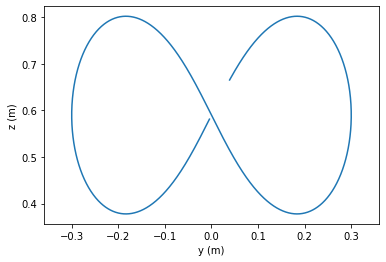

In [18]:
env = FrankaEnv(render = False)
env.reset()
nStates = 10
accuracy_invKin = 0.000001
T = 6 *10 # time horizon 
t = 1.6 + 0.02*np.linspace(0, T*5, T*50+1) # time steps
Steps = len(t)-1


a = 0.3 # scaling parameter of Fig. 8 area
x = 0.3*np.ones((len(t),1)) 
z = np.expand_dims(0.59 + 2* a * np.sin(t) * np.cos(t) / (1+np.sin(t)**2), axis = 1)
y = np.expand_dims(a * np.cos(t) / (1+np.sin(t)**2), axis = 1)
plt.plot(y,z)
plt.axis('equal')
plt.xlabel('y (m)')
plt.ylabel('z (m)')

In [19]:
def Obs(o):
    return np.concatenate((o[:3],o[7:]),axis=0)

def Psi_o(s,net): # Evaluates basis functions Ψ(s(t_k))
    psi = np.zeros([NKoopman,1])
    ds = net.encode(torch.DoubleTensor(s)).detach().cpu().numpy()
    psi[:NKoopman,0] = ds
    return psi

In [20]:
def quat_to_euler(q):
    """ 
    Function that converts quaternions to Euler angles
    
    Inputs
    ------
    q : quaternions
    
    Outputs
    -------
    
    phi, theta, psi : Euler angles
    """
    pi = math.pi
    q0, q1, q2, q3 = q[3], q[0], q[1], q[2]
    test = np.dot(q0,q2) - np.dot(q1,q3)
    if (test > 0.4999): 
        phi = math.atan2(q1*q2 - q0*q3, q1*q3 + q0*q2)
        theta = pi/2
        psi= 0
    elif (test < -0.4999):
        phi = math.atan2(- q1*q2 + q0*q3, - q1*q3 - q0*q2)
        theta = -pi/2
        psi = 0
    else:
        sqx = q1*q1
        sqy = q2*q2
        sqz = q3*q3
        
        psi = math.atan2(2*q2*q1+2*q0*q3 , 1 - 2*sqy - 2*sqz) # Yaw
        theta = math.asin(2*test) # Pitch
        phi = math.atan2(2*q2*q3+2*q0*q1 , 1 - 2*sqx - 2*sqy) # Roll
    return phi, theta, psi

def Psi_x(x): 
    return x

def Run_Franka(Steps, state_desired, LQR_gains,net, x0 = None, y0 = None, z0 = None):
    """
    Function that simulates forward the dynamics of Franka using LQR control, 
    given a desired trajectory and LQR gains
    
    Inputs
    ------
    Steps : Number of steps to propagate discrete dynamics into the future
    state_desired: desired trajectory to track (used for the applied control)
    LQR_gains: LQR gains used together with the current state and desired trajectory 
            to compute control response
            
    Outputs
    -------
    state_traj : state trajectory of the controlled system
    control_traj : control trajectory that was applied to the system
    """
    state = env.reset()
    
    # Set state to desired state to help initiation
    for i, jnt in enumerate(state_desired[0,3:9]):
            pb.resetJointState(env.robot, i, jnt)
    
    # set initial y,z states to given y0, z0
    if x0:
        JointAngles_Fig8 = accurateCalculateInverseKinematics(env.robot, env.ee_id, [x0, y0, z0], accuracy_invKin, 10000)
        for i, jnt in enumerate(JointAngles_Fig8[0:6]):
            pb.resetJointState(env.robot, i, jnt)

    state = env.get_state()

    # Initialize states and controls trajectories
    state_traj, control_traj = np.empty((Steps+1,NKoopman)), np.empty((Steps, 7))
    state_traj[:], control_traj[:] = np.NaN,  np.NaN
    
    # Simulate dynamics forward
    for t in range(Steps):
        state = Obs(state)
        state = Psi_o(state,net)
        state_traj[t, :] = state[:NKoopman].reshape(-1)
        
        control = - np.dot(LQR_gains, (state - Psi_o(state_desired[t+1,:],net)))
        control_traj[t, :] = control.reshape(-1)
        state = env.step(control)
#         time.sleep(1.0/6000.)
#         time.sleep(1.0/600000.)
    
    state = Obs(state)
    state = Psi_o(state,net)
    state_traj[t+1, :] = state[:NKoopman].reshape(-1)
    return state_traj, control_traj

def accurateCalculateInverseKinematics(kukaId, endEffectorId, targetPos, threshold, maxIter):
    """
    Calculates the joint poses given the End Effector location using inverse kinematics
    Note: It changes the Franka configuration during the optimization to the desired configuration
    
    Input: 
    kukaId : Object that represents the Franka system
    endEffectorId : 
    targetPos : 
    threshold : accuracy threshold
    maxIter : maximum iterations to fine tune solution
    
    Output: 
    jointPoses: The angles of the 7 joints of the Franka 
    """
    numJoints = 7
    closeEnough = False
    iter = 0
    dist2 = 1e30
    while (not closeEnough and iter < maxIter):
        jointPoses = pb.calculateInverseKinematics(kukaId, endEffectorId, targetPos)
    
        for i in range(numJoints):
            pb.resetJointState(kukaId, i, jointPoses[i])
        ls = pb.getLinkState(kukaId, endEffectorId)
        newPos = ls[4]
        diff = [targetPos[0] - newPos[0], targetPos[1] - newPos[1], targetPos[2] - newPos[2]]
        dist2 = (diff[0] * diff[0] + diff[1] * diff[1] + diff[2] * diff[2])
        closeEnough = (dist2 < threshold)
        iter = iter + 1
    return jointPoses[:7]

def runLQRonFranka(steps, desired_target, LQR_gains,net, x0 = None, y0 = None, z0 = None, method = False):
    """
    Executes a simulation of specified number of steps applying LQR on Franka with the input LQR gains
        
    Inputs
    ------
    steps : number of steps to forward simulate the system
    desired_target : desired_trajectory to track
    LQR_gains : LQR gains used to compute control
    method : method to print on pdf label; if none is specified, no pdf is created
"""
    state_traj, controls_traj = Run_Franka(steps, desired_target, LQR_gains,net, x0, y0, z0)

    error = np.linalg.norm(state_traj[:,:nStates] - desired_target[:,:nStates])
    if method:
        fig = plt.plot(state_traj[:,1], state_traj[:,2], 'b-', linewidth = 1, markersize = 1)
        plt.plot(desired_target[:,1], desired_target[:,2], 'k--', linewidth = 1)
        plt.axis('equal')
        plt.title(method +': Error = {0:.2f}'.format(error), fontdict=None, loc='center', pad=None)
    return state_traj, controls_traj, error

def desiredStates_from_EndEffector(xyzEndEffector):
    """
    This function takes in the x,y,z coordinates of the end effector (EE) of Franka 
    and returns the closest (locally, using Inverse Kinematics) desired configuration
    to achieve that EE position . 
    
    Inputs
    ------
    x_d, y_d, z_d: End effector coordinates
    
    Outputs
    desired_states: x, y, z, JointAngles, Joint Velocities
    """
    x_d, y_d, z_d = xyzEndEffector[0], xyzEndEffector[1], xyzEndEffector[2]
    jointAngles = np.asarray(accurateCalculateInverseKinematics(env.robot, env.ee_id, [x_d, y_d, z_d], accuracy_invKin, 10000))
    state_des = np.concatenate((xyzEndEffector, jointAngles, np.zeros(7)))

    return state_des

In [21]:
# Translate desired y-z coordinates to desired joint angles of the Franka robotic arm
JointAngles_Fig8 = np.empty((len(t),7))
JointAngles_Fig8[:] = np.NaN
for i in range(len(t)):
    JointAngles_Fig8[i,:] = accurateCalculateInverseKinematics(env.robot, env.ee_id, [x[i], y[i], z[i]], accuracy_invKin, 10000)
states_des = np.concatenate( (x, y, z, JointAngles_Fig8, np.zeros((len(y), 7))), axis = 1)
# states_des = np.concatenate((x,y,z), axis = 1)


In [22]:
##LQR
import lqr
import time
Ad = state_dict['lA.weight'].cpu().numpy()
Bd = state_dict['lB.weight'].cpu().numpy()
Ad = np.matrix(Ad)
Bd = np.matrix(Bd)
Q = np.zeros((NKoopman,NKoopman))
Q[:10,:10] = np.eye(10)
R = 0.1*np.eye(7)
Q = np.matrix(Q)
R = np.matrix(R)
Kopt = lqr.lqr_regulator_k(Ad,Bd,Q,R)
print(Kopt.shape)

(7, 37)


In [23]:
y0, z0 = y[0,0] + np.random.uniform(-0.1, 0.1, 1), z[0,0] + np.random.uniform(-0.1, 0.1, 1)
state_traj_KP, controls_traj_KP, error_KP = runLQRonFranka(Steps, states_des, Kopt,net, x[0,0], y0, z0)

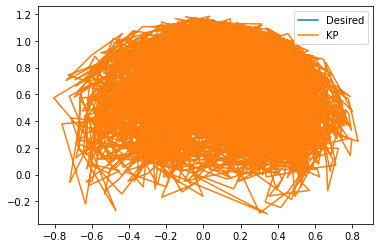

In [24]:
plt.plot(states_des[:,1],states_des[:,2],label='Desired')
plt.plot(state_traj_KP[:,1],state_traj_KP[:,2],label='KP')
plt.legend()
plt.show()